In [65]:
%matplotlib inline
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import imblearn
import sys

import warnings
warnings.filterwarnings('ignore')


In [66]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
train.head()

,protocol_type,service,flag,src_bytes,dst_bytes,hot,count,srv_count,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,class
0,icmp,20,2,491,0,0,2,2,0.00,150,25,0.17,0.03,0.17,0.00,normal
1,udp,45,2,146,0,0,13,1,0.15,255,1,0.00,0.60,0.88,0.00,normal
2,icmp,50,4,0,0,0,123,6,0.07,255,26,0.10,0.05,0.00,1.00,anomaly
3,icmp,25,2,232,8153,0,5,5,0.00,30,255,1.00,0.00,0.03,0.03,normal
4,icmp,25,2,199,420,0,30,32,0.00,255,255,1.00,0.00,0.00,0.00,normal


In [67]:
train.describe()

,service,flag,src_bytes,dst_bytes,hot,count,srv_count,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate
count,25192.000000,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,32.034217,2.581613,2.433063e+04,3.491847e+03,0.198039,84.591180,27.698754,0.062363,182.532074,115.063036,0.519791,0.082539,0.147453,0.285800
std,16.492717,1.145662,2.410805e+06,8.883072e+04,2.154202,114.673451,72.468242,0.178550,98.993895,110.646850,0.448944,0.187191,0.308367,0.445316
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,2.000000,2.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,4.400000e+01,0.000000e+00,0.000000,14.000000,8.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000
75%,50.000000,4.000000,2.790000e+02,5.302500e+02,0.000000,144.000000,18.000000,0.060000,255.000000,255.000000,1.000000,0.070000,0.060000,1.000000
max,70.000000,11.000000,3.817091e+08,5.151385e+06,77.000000,511.000000,511.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [69]:
type_attack = {'normal': 0, 'anomaly': 1}
train['class'] = train['class'].map(type_attack)
test['class'] = test['class'].map(type_attack)
train.head()

,protocol_type,service,flag,src_bytes,dst_bytes,hot,count,srv_count,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,class
0,icmp,20,2,491,0,0,2,2,0.00,150,25,0.17,0.03,0.17,0.00,0
1,udp,45,2,146,0,0,13,1,0.15,255,1,0.00,0.60,0.88,0.00,0
2,icmp,50,4,0,0,0,123,6,0.07,255,26,0.10,0.05,0.00,1.00,1
3,icmp,25,2,232,8153,0,5,5,0.00,30,255,1.00,0.00,0.03,0.03,0
4,icmp,25,2,199,420,0,30,32,0.00,255,255,1.00,0.00,0.00,0.00,0


In [70]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [71]:
le = preprocessing.LabelEncoder()
enc = OneHotEncoder()
lb = preprocessing.LabelBinarizer()

In [72]:
train['protocol_type'] = le.fit_transform(train['protocol_type'])
test['protocol_type'] = le.fit_transform(test['protocol_type'])
train.head()

,protocol_type,service,flag,src_bytes,dst_bytes,hot,count,srv_count,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,class
0,0,20,2,491,0,0,2,2,0.00,150,25,0.17,0.03,0.17,0.00,0
1,2,45,2,146,0,0,13,1,0.15,255,1,0.00,0.60,0.88,0.00,0
2,0,50,4,0,0,0,123,6,0.07,255,26,0.10,0.05,0.00,1.00,1
3,0,25,2,232,8153,0,5,5,0.00,30,255,1.00,0.00,0.03,0.03,0
4,0,25,2,199,420,0,30,32,0.00,255,255,1.00,0.00,0.00,0.00,0


In [73]:
datatrain = train.values
datatest = test.values

In [74]:
X = datatrain[:,0:15]
Y = datatrain[:,15]

In [75]:
W = datatest[:,0:15]
test_rez = datatest[:,15]

In [76]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
test_df = min_max_scaler.fit_transform(W)

In [77]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X_scale, Y, test_size=0.3)

In [78]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape, test_df.shape)

(17634, 15) (7558, 15) (17634,) (7558,) (10000, 15)


In [79]:
from keras.models import Sequential
from keras.layers import Dense

In [80]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(15,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [81]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [82]:
hist = model.fit(train_x, train_y,
         batch_size=32, epochs=30,
         validation_data=(test_x, test_y))

Train on 17634 samples, validate on 7558 samples
Epoch 1/30
17634/17634 [==============================] - 9s 488us/step - loss: 0.4819 - accuracy: 0.8092 - val_loss: 0.3332 - val_accuracy: 0.8797
Epoch 2/30
17634/17634 [==============================] - 6s 316us/step - loss: 0.2921 - accuracy: 0.8708 - val_loss: 0.2487 - val_accuracy: 0.8932
Epoch 3/30
17634/17634 [==============================] - 6s 327us/step - loss: 0.2376 - accuracy: 0.8961 - val_loss: 0.2145 - val_accuracy: 0.9070
Epoch 4/30
17634/17634 [==============================] - 6s 364us/step - loss: 0.2143 - accuracy: 0.9066 - val_loss: 0.1977 - val_accuracy: 0.9136
Epoch 5/30
17634/17634 [==============================] - 6s 322us/step - loss: 0.2022 - accuracy: 0.9141 - val_loss: 0.1896 - val_accuracy: 0.9188
Epoch 6/30
17634/17634 [==============================] - 5s 302us/step - loss: 0.1947 - accuracy: 0.9183 - val_loss: 0.1858 - val_accuracy: 0.9260
Epoch 7/30
17634/17634 [==============================] - 6s 34

In [87]:
model.evaluate(test_df, test_rez)[0]

10000/10000 [==============================] - 1s 134us/step


0.8441428077220917

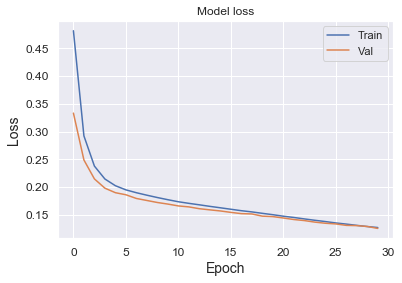

In [88]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

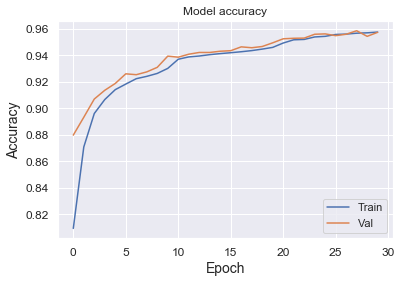

In [89]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()